<a href="https://colab.research.google.com/github/leonardosantosp/IA-cancer-de-mama/blob/main/IA_Cancer_de_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autores:
<br> <b>Leonardo dos Santos Paiva RA: 2022.1.08.012
<p>Pedro Ywao Fujimoto RA: 2022.1.08.042


# Base de dados


O problema abordado nesse trabalho será sobre a doença `cancer de mama` Malígno ou Benígno.

O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem câncer de mama, com base em certas medidas de diagnóstico incluídas no conjunto de dados.

a base de dados está disponível em `cancer de mama` (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)


# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import warnings
import random

from more_itertools import flatten
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors



# Lendo a base de dados


In [ ]:
#Lendo a base de dados e nomeando as colunas com base nos nomes fornecidos pelo próprio site

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
                'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
                'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
                'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
                'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
                'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
                'symmetry3', 'fractal_dimension3']
dataset = pd.read_csv(url, names=column_names, header=None)

dataset.drop('ID', axis=1, inplace=True)
#Trocando o target de M,B para 1,0 respectivamente
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M': 1, 'B':0})

target_column = ['Diagnosis']
#--------------------------------------------------
predictors = list(set(list(dataset.columns))-set(target_column))
dataset[predictors] = dataset[predictors]/dataset[predictors].max()
print("Estatística descritiva das variáveis normalizadas:")
dataset[predictors].describe().transpose()

Estatística descritiva das variáveis normalizadas:


,count,mean,std,min,25%,50%,75%,max
concavity3,569.0,0.217403,0.166633,0.000000,0.091454,0.181070,0.305831,1.0
concave_points1,569.0,0.243137,0.192857,0.000000,0.100944,0.166501,0.367793,1.0
concavity2,569.0,0.080540,0.076227,0.000000,0.038106,0.065379,0.106187,1.0
smoothness1,569.0,0.589720,0.086072,0.322093,0.528580,0.586720,0.644431,1.0
area2,569.0,0.074395,0.083901,0.012545,0.032921,0.045242,0.083346,1.0
symmetry3,569.0,0.436992,0.093202,0.235764,0.377222,0.425128,0.478909,1.0
area1,569.0,0.261851,0.140709,0.057377,0.168053,0.220352,0.312955,1.0
area3,569.0,0.207001,0.133840,0.043535,0.121133,0.161378,0.254819,1.0
texture2,569.0,0.249100,0.112927,0.073736,0.170706,0.226817,0.301740,1.0
radius2,569.0,0.141028,0.096524,0.038810,0.080891,0.112844,0.166690,1.0


In [ ]:
#--------------------------------------------------
#Criando os conjuntos de dados de treinamento e teste
#--------------------------------------------------
#As primeiras linhas de código abaixo criam arrays das variáveis ​​independentes
# entrada_X e dependentes (saidaDesejada_y), respectivamente.
#--------------------------------------------------
#A terceira linha divide os dados em conjunto de dados de treinamento e teste,
#A quarta linha imprime a forma dos dados de treinamento e teste.
entrada_X = dataset[predictors].values
saidaDesejada_y = dataset[target_column].values
# Aplicando a funcao train_test_split para dividir o conjunto original em 70% para treindo e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(entrada_X, saidaDesejada_y, test_size=0.3, random_state=42)
#--------------------------------------------------
print("Conjunto de treinamento:")
print(X_train.shape);
print("Conjunto de teste:")
print(X_test.shape)

# Aplicando a funcao train_test_split para dividir o conjunto de treinamento em 50% cada.
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

print("Conjunto de treinamento 1:")
print(X_train1.shape);
print("Conjunto de treinamento 2:")
print(X_train2.shape);

# Convertendo y_train1 e y_test para arrays unidimensionais
y_train1 = y_train1.ravel()
y_test = y_test.ravel()

Conjunto de treinamento:
(398, 30)
Conjunto de teste:
(171, 30)
Conjunto de treinamento 1:
(199, 30)
Conjunto de treinamento 2:
(199, 30)


#**Treinamento**


Função genérica para o treinamento



In [ ]:
def train_and_evaluate_model(model_func, X_train, y_train, X_test, y_test, index, area_test, area_model):
    list_accuracy_train = [0] * area_model
    list_recall_train = [0] * area_model
    list_precision_train = [0] * area_model
    list_f1_train = [0] * area_model

    list_accuracy_test = [0] * area_model
    list_recall_test = [0] * area_model
    list_precision_test = [0] * area_model
    list_f1_test = [0] * area_model

    list_sum_total = [0] * area_model

    for i in range(area_model):
        model_instance = model_func(i)

        accuracy_train_sum = 0
        recall_train_sum = 0
        precision_train_sum = 0
        f1_train_sum = 0

        accuracy_test_sum = 0
        recall_test_sum = 0
        precision_test_sum = 0
        f1_test_sum = 0

        for j in range(area_test):
            model_instance.fit(X_train, y_train)
            y_pred_train = model_instance.predict(X_train)
            y_pred_test = model_instance.predict(X_test)

            accuracy_train_sum += accuracy_score(y_train, y_pred_train)
            recall_train_sum += recall_score(y_train, y_pred_train, average='macro')
            precision_train_sum += precision_score(y_train, y_pred_train, average='macro')
            f1_train_sum += f1_score(y_train, y_pred_train, average='macro')

            accuracy_test_sum += accuracy_score(y_test, y_pred_test)
            recall_test_sum += recall_score(y_test, y_pred_test, average='macro')
            precision_test_sum += precision_score(y_test, y_pred_test, average='macro')
            f1_test_sum += f1_score(y_test, y_pred_test, average='macro')

        list_accuracy_train[i] = accuracy_train_sum / area_test
        list_recall_train[i] = recall_train_sum / area_test
        list_precision_train[i] = precision_train_sum / area_test
        list_f1_train[i] = f1_train_sum / area_test

        list_accuracy_test[i] = accuracy_test_sum / area_test
        list_recall_test[i] = recall_test_sum / area_test
        list_precision_test[i] = precision_test_sum / area_test
        list_f1_test[i] = f1_test_sum / area_test

        list_sum_total[i] = (list_accuracy_test[i] + list_recall_test[i] + list_precision_test[i] + list_f1_test[i]) / 4

    for i in range(area_model):
        print('Modelo', i)
        print('Acurácia: ', list_accuracy_test[i])
        print('Recall: ', list_recall_test[i])
        print('Precision: ', list_precision_test[i])
        print('f1 Score: ', list_f1_test[i])
        print('-------------------------------------------------')

    print('-------------Conjunto de Treino -----------------')
    print('Acurácia: ', statistics.mean(list_accuracy_train))
    print('Recall: ', statistics.mean(list_recall_train))
    print('Precision: ', statistics.mean(list_precision_train))
    print('f1 Score: ', statistics.mean(list_f1_train))
    print('-------------------------------------------------')

    print('-------------Conjunto de Teste ------------------')
    print('Acurácia: ', statistics.mean(list_accuracy_test))
    print('Recall: ', statistics.mean(list_recall_test))
    print('Precision: ', statistics.mean(list_precision_test))
    print('f1 Score: ', statistics.mean(list_f1_test))
    print('-------------------------------------------------')

    filtered_list_sum_total = [x for x in list_sum_total if x not in (None, 0)]

    list_max_and_min[index] = max(filtered_list_sum_total)
    list_recall[index] = max(list_recall_test)

    if area_model == 1:
        return {
            'list_max_and_min': max(filtered_list_sum_total),
            'list_recall': max(list_recall_test),
            'list_sum_total': list_sum_total,
            'list_accuracy_test': list_accuracy_test,
            'list_recall_test': list_recall_test,
            'list_precision_test': list_precision_test,
            'list_f1_test': list_f1_test,
            'list_accuracy_train': list_accuracy_train,
            'list_recall_train': list_recall_train,
            'list_precision_train': list_precision_train,
            'list_f1_train': list_f1_train
        }
    else:
        return {
            'maximo': max(filtered_list_sum_total),
            'minimo': min(filtered_list_sum_total),
            'list_max_and_min': [max(filtered_list_sum_total), min(filtered_list_sum_total)],
            'list_recall': max(list_recall_test),
            'list_sum_total': list_sum_total,
            'list_accuracy_test': list_accuracy_test,
            'list_recall_test': list_recall_test,
            'list_precision_test': list_precision_test,
            'list_f1_test': list_f1_test,
            'list_accuracy_train': list_accuracy_train,
            'list_recall_train': list_recall_train,
            'list_precision_train': list_precision_train,
            'list_f1_train': list_f1_train
        }

#KNN

In [ ]:
# Definindo a função para criar instâncias de modelos
def knn_model(i):
    lista_intervalo = list(range(10, 60))
    weights_options = ['uniform', 'distance']
    algorithm_options = ['auto', 'ball_tree', 'kd_tree', 'brute']
    # Embaralhando com seed fixa para garantir determinismo
    random.seed(i)
    random.shuffle(lista_intervalo)

    return KNeighborsClassifier(
        n_neighbors=lista_intervalo[i % len(lista_intervalo)],
        weights=random.choice(weights_options),
        algorithm=random.choice(algorithm_options)
    )

Realizando o treinamento para as bases de treino 1 e 2

In [ ]:
#inicializando as variáveis modelo 1

accuracy_knn_train1 = [0] * 15
recall_knn_train1 = [0] * 15
precision_knn_train1 = [0] * 15
f1_knn_train1 = [0] * 15

accuracy_knn_test1 = [0] * 15
recall_knn_test1 = [0] * 15
precision_knn_test1 = [0] * 15
f1_knn_test1 = [0] * 15

#inicializando as variáveis modelo 2

accuracy_knn_train2 = [0] * 15
recall_knn_train2 = [0] * 15
precision_knn_train2 = [0] * 15
f1_knn_train2 = [0] * 15

accuracy_knn_test2 = [0] * 15
recall_knn_test2 = [0] * 15
precision_knn_test2 = [0] * 15
f1_knn_test2 = [0] * 15

# Inicializando variáveis
list_max_and_min = [0] * 10
list_recall = [0] * 9

list_sum_total_knn1 = [0] * 15
list_sum_total_knn2 = [0] * 15

results_knn1 = train_and_evaluate_model(knn_model, X_train1, y_train1, X_test, y_test, 0, 1, 1)
results_knn2 = train_and_evaluate_model(knn_model, X_train2, y_train2, X_test, y_test, 1, 1, 1)

# Atualizando variáveis globais com os resultados de KNN
list_sum_total_knn1 = results_knn1['list_sum_total']
list_sum_total_knn2 = results_knn2['list_sum_total']

accuracy_knn_test1 = results_knn1['list_accuracy_test']
recall_knn_test1 = results_knn1['list_recall_test']
precision_knn_test1 = results_knn1['list_precision_test']
f1_knn_test1 = results_knn1['list_f1_test']

accuracy_knn_train1 = results_knn1['list_accuracy_train']
recall_knn_train1 = results_knn1['list_recall_train']
precision_knn_train1 = results_knn1['list_precision_train']
f1_knn_train1 = results_knn1['list_f1_train']

accuracy_knn_test2 = results_knn2['list_accuracy_test']
recall_knn_test2 = results_knn2['list_recall_test']
precision_knn_test2 = results_knn2['list_precision_test']
f1_knn_test2 = results_knn2['list_f1_test']

accuracy_knn_train2 = results_knn2['list_accuracy_train']
recall_knn_train2 = results_knn2['list_recall_train']
precision_knn_train2 = results_knn2['list_precision_train']
f1_knn_train2 = results_knn2['list_f1_train']


Modelo 0
Acurácia:  0.9415204678362573
Recall:  0.9272486772486772
Precision:  0.9473684210526316
f1 Score:  0.9358108108108109
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.9346733668341709
Recall:  0.9203747072599531
Precision:  0.9433093848226313
f1 Score:  0.9294807141883603
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.9415204678362573
Recall:  0.9272486772486772
Precision:  0.9473684210526316
f1 Score:  0.9358108108108109
-------------------------------------------------
Modelo 0
Acurácia:  0.9298245614035088
Recall:  0.908068783068783
Precision:  0.9439558682443236
f1 Score:  0.9217271895025938
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.914572864321608
Recall:  0.8819444444444444
Precision:  0.9409722222222222
f1 Score:  0.9017055524885957
---------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


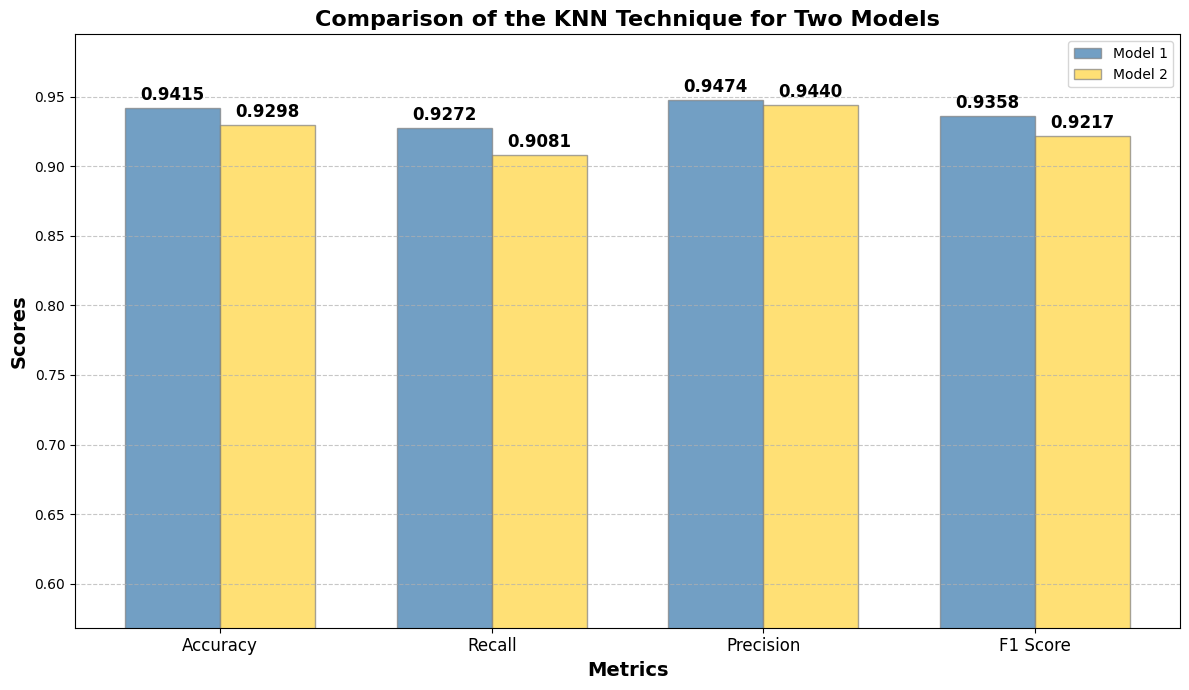

In [ ]:

# Valores das métricas para cada série de dados
values1 = [np.mean(accuracy_knn_test1), np.mean(recall_knn_test1), np.mean(precision_knn_test1), np.mean(f1_knn_test1)]
values2 = [np.mean(accuracy_knn_test2), np.mean(recall_knn_test2), np.mean(precision_knn_test2), np.mean(f1_knn_test2)]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the KNN Technique for Two Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# Floresta Aleatória


In [ ]:
def rf_model(i):
    lista_intervalo = list(range(10, 100))
    criterion_options = ['gini', 'entropy']
    max_features_options = ['auto', 'sqrt', 'log2']
    random.shuffle(lista_intervalo)
    return RandomForestClassifier(
        n_estimators=lista_intervalo[i],
        criterion=random.choice(criterion_options),
        max_features=random.choice(max_features_options)
    )

Realizando o treino para a base de dados 1 e 2

In [ ]:
#inicializando as variáveis modelo 1

accuracy_rf_train1 = [0] * 15
recall_rf_train1 = [0] * 15
precision_rf_train1 = [0] * 15
f1_rf_train1 = [0] * 15

accuracy_rf_test1 = [0] * 15
recall_rf_test1 = [0] * 15
precision_rf_test1 = [0] * 15
f1_rf_test1 = [0] * 15

#inicializando as variáveis modelo 2

accuracy_rf_train2 = [0] * 15
recall_rf_train2 = [0] * 15
precision_rf_train2 = [0] * 15
f1_rf_train2 = [0] * 15

accuracy_rf_test2 = [0] * 15
recall_rf_test2 = [0] * 15
precision_rf_test2 = [0] * 15
f1_rf_test2 = [0] * 15

# Inicializando variáveis
list_max_and_min = [0] * 10
list_recall = [0] * 9

list_sum_total_rf1 = [0] * 15
list_sum_total_rf2 = [0] * 15

results_rf1 = train_and_evaluate_model(rf_model, X_train1, y_train1, X_test, y_test, 2, 5, 3)
results_rf2 = train_and_evaluate_model(rf_model, X_train2, y_train2, X_test, y_test, 4, 5, 3)

# Atualizando variáveis globais com os resultados
list_sum_total_rf1 = results_rf1['list_sum_total']

list_sum_total_rf2 = results_rf2['list_sum_total']

accuracy_rf_test1 = results_rf1['list_accuracy_test']
recall_rf_test1 = results_rf1['list_recall_test']
precision_rf_test1 = results_rf1['list_precision_test']
f1_rf_test1 = results_rf1['list_f1_test']

accuracy_rf_train1 = results_rf1['list_accuracy_train']
recall_rf_train1 = results_rf1['list_recall_train']
precision_rf_train1 = results_rf1['list_precision_train']
f1_rf_train1 = results_rf1['list_f1_train']

accuracy_rf_test2 = results_rf2['list_accuracy_test']
recall_rf_test2 = results_rf2['list_recall_test']
precision_rf_test2 = results_rf2['list_precision_test']
f1_rf_test2 = results_rf2['list_f1_test']

accuracy_rf_train2 = results_rf2['list_accuracy_train']
recall_rf_train2 = results_rf2['list_recall_train']
precision_rf_train2 = results_rf2['list_precision_train']
f1_rf_train2 = results_rf2['list_f1_train']

Modelo 0
Acurácia:  0.9730994152046784
Recall:  0.9648148148148147
Precision:  0.977907199234633
f1 Score:  0.970705471561837
-------------------------------------------------
Modelo 1
Acurácia:  0.9730994152046784
Recall:  0.9661375661375662
Precision:  0.9763205791154436
f1 Score:  0.970796619986612
-------------------------------------------------
Modelo 2
Acurácia:  0.9742690058479532
Recall:  0.9677248677248678
Precision:  0.9771390018931003
f1 Score:  0.9720949305902387
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.9996649916247906
Recall:  0.9995670995670995
Precision:  0.9997289972899729
f1 Score:  0.999646080654484
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.9734892787524366
Recall:  0.9662257495590829
Precision:  0.977122260081059
f1 Score:  0.9711990073795626
-------------------------------------------------


<ipython-input-439-370693ab5795>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-439-370693ab5795>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-439-370693ab5795>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-439-370693ab5795>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_instance.fit(X_train, y_train)
<ipython-input-439-370693ab5795>:28: DataConversionWarning: A column-vector 

Modelo 0
Acurácia:  0.9578947368421051
Recall:  0.9494708994708996
Precision:  0.9599153254321356
f1 Score:  0.954246707488446
-------------------------------------------------
Modelo 1
Acurácia:  0.9625730994152046
Recall:  0.9544973544973544
Precision:  0.9650908702263246
f1 Score:  0.959343577831218
-------------------------------------------------
Modelo 2
Acurácia:  0.9614035087719298
Recall:  0.9542328042328041
Precision:  0.9628783837005604
f1 Score:  0.9581778919827022
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  1.0
Recall:  1.0
Precision:  1.0
f1 Score:  1.0
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.9606237816764132
Recall:  0.9527336860670194
Precision:  0.9626281931196735
f1 Score:  0.9572560591007887
-------------------------------------------------


Comparando o resultado para os dois conjuntos de testes

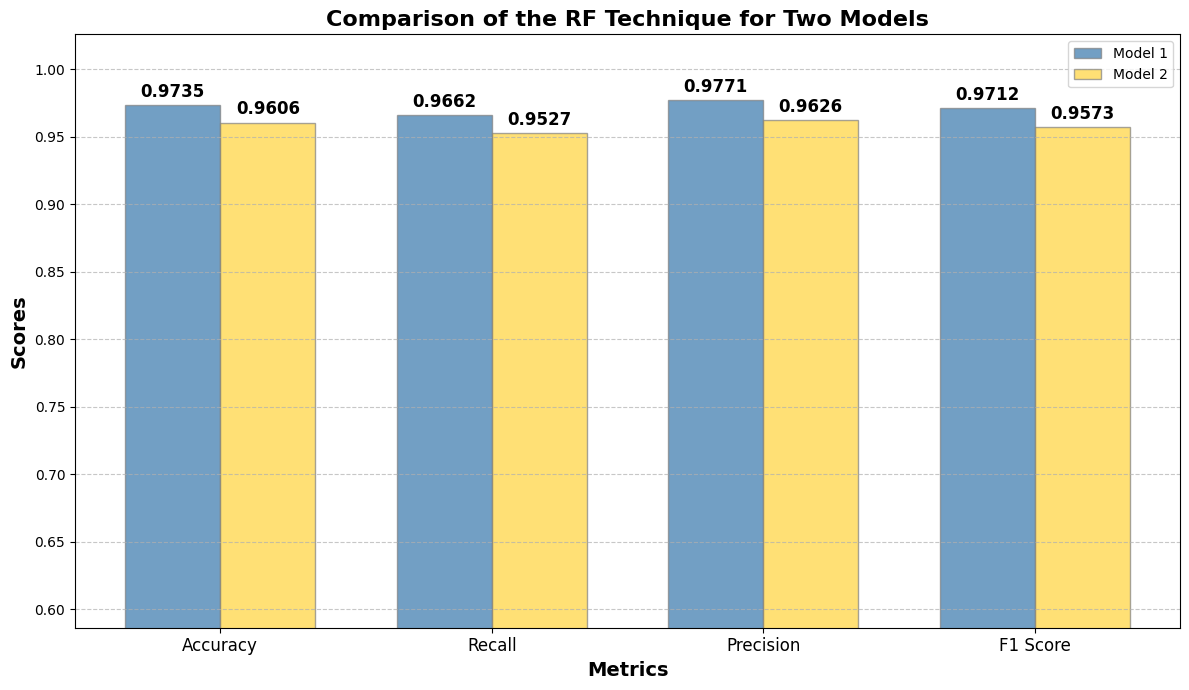

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores das métricas para cada série de dados
values1 = [np.mean(accuracy_rf_test1), np.mean(recall_rf_test1), np.mean(precision_rf_test1), np.mean(f1_rf_test1)]
values2 = [np.mean(accuracy_rf_test2), np.mean(recall_rf_test2), np.mean(precision_rf_test2), np.mean(f1_rf_test2)]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the RF Technique for Two Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# MLP

<h1>Redes Neurais Artificiais - RNAs</h1>


Realizando o treinamento pela técnica de `Rede Neural Artificial do tipo MultiLayer Perceptron (RNAs/MLP)`.

In [ ]:
def mlp_model(i):
    activation_options = ['tanh', 'relu']
    solver_options = ['sgd', 'adam']
    return MLPClassifier(
        hidden_layer_sizes=((5*i)+30),
        activation=random.choice(activation_options),
        solver=random.choice(solver_options),
        max_iter=((i*30)+180),
        alpha=0.0001,
        learning_rate_init=0.001,
        random_state=None
    )

Realizando o treinamento para a base de dados 1 e 2



In [ ]:
#inicializando as variáveis modelo 1

accuracy_mlp_train1 = [0] * 15
recall_mlp_train1 = [0] * 15
precision_mlp_train1 = [0] * 15
f1_mlp_train1 = [0] * 15

accuracy_mlp_test1 = [0] * 15
recall_mlp_test1 = [0] * 15
precision_mlp_test1 = [0] * 15
f1_mlp_test1 = [0] * 15

#inicializando as variáveis modelo 2

accuracy_mlp_train2 = [0] * 15
recall_mlp_train2 = [0] * 15
precision_mlp_train2 = [0] * 15
f1_mlp_train2 = [0] * 15

accuracy_mlp_test2 = [0] * 15
recall_mlp_test2 = [0] * 15
precision_mlp_test2 = [0] * 15
f1_mlp_test2 = [0] * 15

# Inicializando variáveis
list_max_and_min = [0] * 10
list_recall = [0] * 9

list_sum_total_mlp1 = [0] * 15
list_sum_total_mlp2 = [0] * 15

results_mlp1 = train_and_evaluate_model(mlp_model, X_train1, y_train1, X_test, y_test, 6, 5, 3)
results_mlp2 = train_and_evaluate_model(mlp_model, X_train2, y_train2, X_test, y_test, 8, 5, 3)

# Atualizando variáveis globais com os resultados
list_sum_total_mlp1 = results_mlp1['list_sum_total']

list_sum_total_mlp2 = results_mlp2['list_sum_total']

accuracy_mlp_test1 = results_mlp1['list_accuracy_test']
recall_mlp_test1 = results_mlp1['list_recall_test']
precision_mlp_test1 = results_mlp1['list_precision_test']
f1_mlp_test1 = results_mlp1['list_f1_test']

accuracy_mlp_train1 = results_mlp1['list_accuracy_train']
recall_mlp_train1 = results_mlp1['list_recall_train']
precision_mlp_train1 = results_mlp1['list_precision_train']
f1_mlp_train1 = results_mlp1['list_f1_train']

accuracy_mlp_test2 = results_mlp2['list_accuracy_test']
recall_mlp_test2 = results_mlp2['list_recall_test']
precision_mlp_test2 = results_mlp2['list_precision_test']
f1_mlp_test2 = results_mlp2['list_f1_test']

accuracy_mlp_train2 = results_mlp2['list_accuracy_train']
recall_mlp_train2 = results_mlp2['list_recall_train']
precision_mlp_train2 = results_mlp2['list_precision_train']
f1_mlp_train2 = results_mlp2['list_f1_train']


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Modelo 0
Acurácia:  0.9298245614035088
Recall:  0.9133597883597883
Precision:  0.9362492350741478
f1 Score:  0.9227642643753363
-------------------------------------------------
Modelo 1
Acurácia:  0.8081871345029239
Recall:  0.7416666666666667
Precision:  0.8765733927767354
f1 Score:  0.7576021618339996
-------------------------------------------------
Modelo 2
Acurácia:  0.8374269005847953
Recall:  0.7806878306878307
Precision:  0.8936212357955089
f1 Score:  0.8017412722994258
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.8458961474036851
Recall:  0.803899652260308
Precision:  0.8953546486349765
f1 Score:  0.8140735053569634
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.8584795321637426
Recall:  0.8119047619047619
Precision:  0.9021479545487974
f1 Score:  0.827369232836254
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (180) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

Modelo 0
Acurácia:  0.9181286549707602
Recall:  0.8981481481481481
Precision:  0.9263688277788711
f1 Score:  0.9092871423531511
-------------------------------------------------
Modelo 1
Acurácia:  0.7064327485380117
Recall:  0.6022486772486773
Precision:  0.7323841443522612
f1 Score:  0.5671402976916443
-------------------------------------------------
Modelo 2
Acurácia:  0.9251461988304094
Recall:  0.9096560846560845
Precision:  0.9290896557891635
f1 Score:  0.9178188907982564
-------------------------------------------------
-------------Conjunto de Treino -----------------
Acurácia:  0.8472361809045226
Recall:  0.7918963254593177
Precision:  0.8723602904823956
f1 Score:  0.7849998618282448
-------------------------------------------------
-------------Conjunto de Teste ------------------
Acurácia:  0.8499025341130605
Recall:  0.8033509700176367
Precision:  0.8626142093067652
f1 Score:  0.7980821102810173
-------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  warnings.warn(


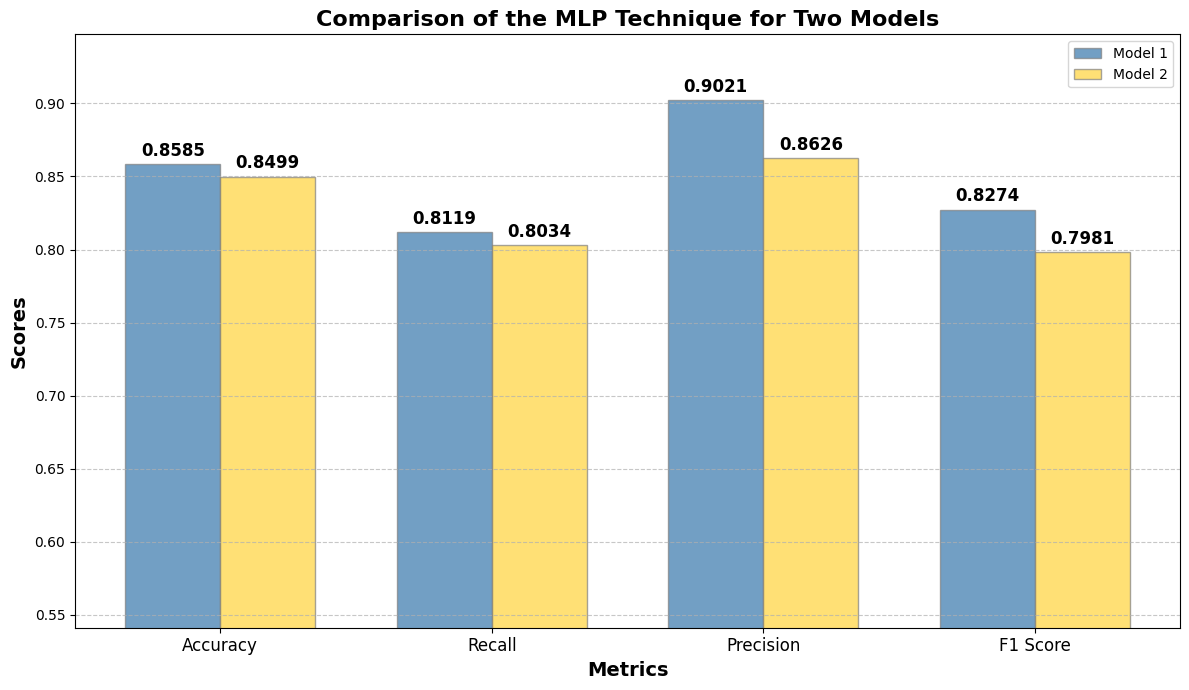

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Valores das métricas para cada série de dados
values1 = [np.mean(accuracy_mlp_test1), np.mean(recall_mlp_test1), np.mean(precision_mlp_test1), np.mean(f1_mlp_test1)]
values2 = [np.mean(accuracy_mlp_test2), np.mean(recall_mlp_test2), np.mean(precision_mlp_test2), np.mean(f1_mlp_test2)]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the MLP Technique for Two Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [ ]:
# Atualizando list_max_and_min com os resultados combinados de KNN e RF
list_max_and_min[0] = results_knn1['list_max_and_min']
list_max_and_min[1] = results_knn2['list_max_and_min']
list_max_and_min[2] = results_rf1['maximo']
list_max_and_min[3] = results_rf1['minimo']
list_max_and_min[4] = results_rf2['maximo']
list_max_and_min[5] = results_rf2['minimo']
list_max_and_min[6] = results_mlp1['maximo']
list_max_and_min[7] = results_mlp1['minimo']
list_max_and_min[8] = results_mlp2['maximo']
list_max_and_min[9] = results_mlp2['minimo']

list_recall[0] = results_knn1['list_recall']
list_recall[1] = results_knn2['list_recall']
list_recall[2] = results_rf1['list_recall']
list_recall[3] = results_rf2['list_recall']
list_recall[4] = results_mlp1['list_recall']
list_recall[5] = results_mlp2['list_recall']


# Comparando os resultados


Verificando o melhor modelo com base na media de todas as precisões

In [ ]:
#Verificando o melhor modelo com base nas médias

maximo = list_max_and_min.index(max(list_max_and_min))

if(maximo==0):
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 1 usando KNN')
  print('Acurácia:', accuracy_knn_test1[0])
  print('Recall:', recall_knn_test1[0])
  print('Precision:', precision_knn_test1[0])
  print('f1 Score:', f1_knn_test1[0])
elif(maximo==1):
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 2 usando KNN')
  print('Acurácia:', accuracy_knn_test2[0])
  print('Recall:', recall_knn_test2[0])
  print('Precision:', precision_knn_test2[0])
  print('f1 Score:', f1_knn_test2[0])
elif(maximo==2):
  indice = list_sum_total_rf1.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 1 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test1[maximo])
  print('Recall:', recall_rf_test1[maximo])
  print('Precision:', precision_rf_test1[maximo])
  print('f1 Score:', f1_rf_test1[maximo])
elif(maximo==4):
  indice = list_sum_total_rf2.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 2 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test2[indice])
  print('Recall:', recall_rf_test2[indice])
  print('Precision:', precision_rf_test2[indice])
  print('f1 Score:', f1_rf_test2[indice])
elif(maximo==6):
  indice = list_sum_total_mlp1.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 1 usando MLP')
  print('Acurácia:', accuracy_mlp_test1[indice])
  print('Recall:', recall_mlp_test1[indice])
  print('Precision:', precision_mlp_test1[indice])
  print('f1 Score:', f1_mlp_test1[indice])
elif(maximo==8):
  indice = list_sum_total_mlp2.index(max(list_max_and_min))
  print('O melhor modelo foi o MODELO', maximo, 'para a base de dados 2 usando MLP')
  print('Acurácia:', accuracy_mlp_test2[maximo])
  print('Recall:', recall_mlp_test2[maximo])
  print('Precision:', precision_mlp_test2[maximo])
  print('f1 Score:', f1_mlp_test2[maximo])



O melhor modelo foi o MODELO 2 para a base de dados 1 usando Floresta Aleatória
Acurácia: 0.9742690058479532
Recall: 0.9677248677248678
Precision: 0.9771390018931003
f1 Score: 0.9720949305902387


Agora considerando na vida real, o melhor modelo seria aquele com o menor número de Falso Negativo, logo, quanto maior o recall melhor seria para esse caso

In [ ]:
#Verificando o melhor modelo com base no recall

indice = list_recall.index(max(list_recall))
if(indice==0):
  print('O melhor modelo foi o MODELO', indice, 'para a base de dados 1 usando KNN')
  print('Acurácia:', accuracy_knn_test1[0])
  print('Recall:', recall_knn_test1[0])
  print('Precision:', precision_knn_test1[0])
  print('f1 Score:', f1_knn_test1[0])
elif(indice==1):
  print('O melhor modelo foi o MODELO', indice, 'para a base de dados 2 usando KNN')
  print('Acurácia:', accuracy_knn_test2[0])
  print('Recall:', recall_knn_test2[0])
  print('Precision:', precision_knn_test2[0])
  print('f1 Score:', f1_knn_test2[0])
elif(indice==2):
  indice = recall_rf_test1.index(max(list_recall))
  print('O melhor modelo foi o MODELO', indice, 'para a base de dados 1 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test1[indice])
  print('Recall:', recall_rf_test1[indice])
  print('Precision:', precision_rf_test1[indice])
  print('f1 Score:', f1_rf_test1[indice])
elif(indice==3):
  indice = recall_rf_test2.index(max(list_recall))
  print('O melhor modelo foi o MODELO', indice, 'para a base de dados 2 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test2[indice])
  print('Recall:', recall_rf_test2[indice])
  print('Precision:', precision_rf_test2[indice])
  print('f1 Score:', f1_rf_test2[indice])
elif(indice==4):
  indice = recall_mlp_test1.index(max(list_recall))
  print('O melhor modelo foi o MODELO', indice, 'para a base de dados 1 usando MLP')
  print('Acurácia:', accuracy_mlp_test1[indice])
  print('Recall:', recall_mlp_test1[indice])
  print('Precision:', precision_mlp_test1[indice])
  print('f1 Score:', f1_mlp_test1[indice])
elif(indice==5):
  indice = recall_mlp_test2.index(max(list_recall))
  print('O melhor modelo foi o MODELO', indice, 'para a base de dados 2 usando MLP')
  print('Acurácia:', accuracy_mlp_test2[indice])
  print('Recall:', recall_mlp_test2[indice])
  print('Precision:', precision_mlp_test2[indice])
  print('f1 Score:', f1_mlp_test2[indice])



O melhor modelo foi o MODELO 2 para a base de dados 1 usando Floresta Aleatória
Acurácia: 0.9742690058479532
Recall: 0.9677248677248678
Precision: 0.9771390018931003
f1 Score: 0.9720949305902387


Calculando agora o pior modelo

In [ ]:
#Verificando o pior modelo com base nas médias

minimo = list_max_and_min.index(min(list_max_and_min))

if(minimo==0):
  print('O pior modelo foi o MODELO 0 para a base de dados 1 usando KNN')
  print('Acurácia:', accuracy_knn_test1[0])
  print('Recall:', recall_knn_test1[0])
  print('Precision:', precision_knn_test1[0])
  print('f1 Score:', f1_knn_test1[0])
elif(minimo==1):
  print('O pior modelo foi o MODELO 1 para a base de dados 2 usando KNN')
  print('Acurácia:', accuracy_knn_test2[0])
  print('Recall:', recall_knn_test2[0])
  print('Precision:', precision_knn_test2[0])
  print('f1 Score:', f1_knn_test2[0])
elif(minimo==3):
  indice = list_sum_total_rf1.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', minimo, 'para a base de dados 1 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test1[indice])
  print('Recall:', recall_rf_test1[indice])
  print('Precision:', precision_rf_test1[indice])
  print('f1 Score:', f1_rf_test1[indice])
elif(minimo==5):
  indice = list_sum_total_rf2.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', minimo, 'para a base de dados 2 usando Floresta Aleatória')
  print('Acurácia:', accuracy_rf_test2[indice])
  print('Recall:', recall_rf_test2[indice])
  print('Precision:', precision_rf_test2[indice])
  print('f1 Score:', f1_rf_test2[indice])
elif(minimo==7):
  indice = list_sum_total_mlp1.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', minimo, 'para a base de dados 1 usando MLP')
  print('Acurácia:', accuracy_mlp_test1[indice])
  print('Recall:', recall_mlp_test1[indice])
  print('Precision:', precision_mlp_test1[indice])
  print('f1 Score:', f1_mlp_test1[indice])
elif(minimo==9):
  indice = list_sum_total_mlp2.index(min(list_max_and_min))
  print('O pior modelo foi o MODELO', indice, 'para a base de dados 2 usando MLP')
  print('Acurácia:', accuracy_mlp_test2[indice])
  print('Recall:', recall_mlp_test2[indice])
  print('Precision:', precision_mlp_test2[indice])
  print('f1 Score:', f1_mlp_test2[indice])


O pior modelo foi o MODELO 1 para a base de dados 2 usando MLP
Acurácia: 0.7064327485380117
Recall: 0.6022486772486773
Precision: 0.7323841443522612
f1 Score: 0.5671402976916443


Montando o gráfico para os modelos

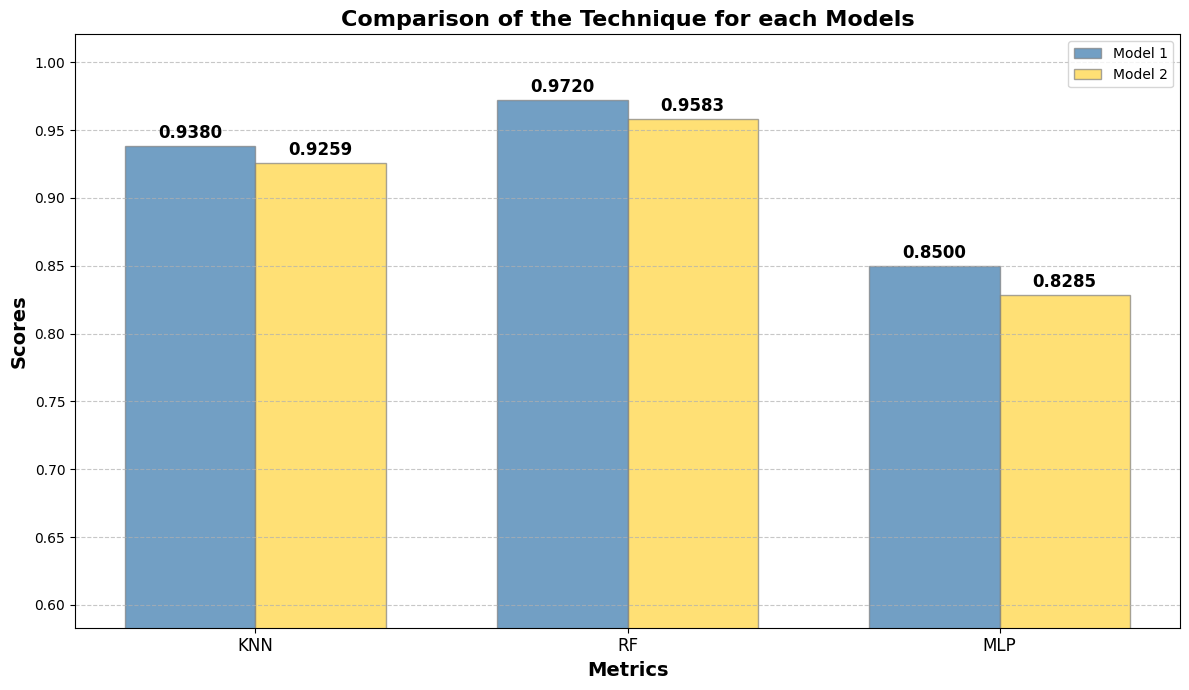

In [ ]:
# Calculando as médias das métricas
x = np.mean(accuracy_knn_test1 + recall_knn_test1 + precision_knn_test1 + f1_knn_test1)
y = np.mean(accuracy_rf_test1 + recall_rf_test1 + precision_rf_test1 + f1_rf_test1)
z = np.mean(accuracy_mlp_test1 + recall_mlp_test1 + precision_mlp_test1 + f1_mlp_test1)

u = np.mean(accuracy_knn_test2 + recall_knn_test2 + precision_knn_test2 + f1_knn_test2)
v = np.mean(accuracy_rf_test2 + recall_rf_test2 + precision_rf_test2 + f1_rf_test2)
w = np.mean(accuracy_mlp_test2 + recall_mlp_test2 + precision_mlp_test2 + f1_mlp_test2)

# Valores das métricas para cada série de dados
values1 = [x, y, z]
values2 = [u, v, w]

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Nomes das métricas para o eixo x
metrics = ['KNN', 'RF', 'MLP']

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], metrics, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of the Technique for each Models', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


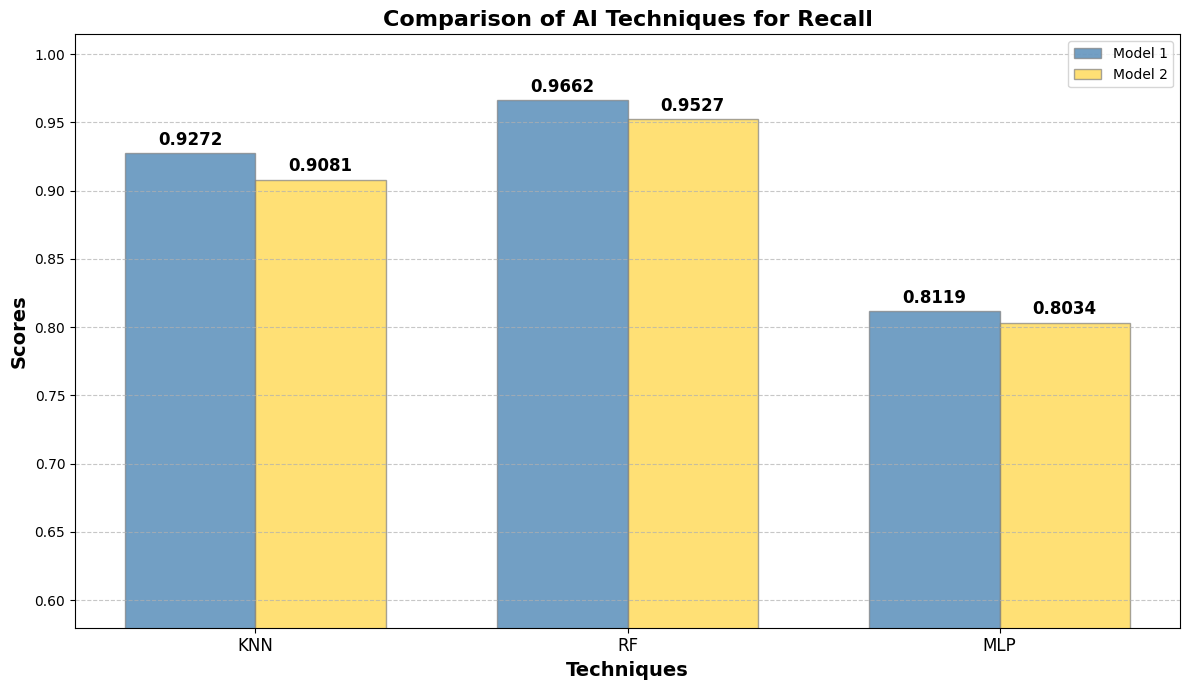

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Suposições de que as variáveis accuracy_knn_test1, recall_knn_test1, etc. já foram definidas
# e contêm listas de valores de desempenho.

# Função para calcular a média de todas as métricas fornecidas
def calculate_mean(*metrics):
    return np.mean(np.concatenate(metrics))

# Calculando as médias das métricas para cada técnica e cada modelo
x = calculate_mean(recall_knn_test1)
y = calculate_mean(recall_rf_test1)
z = calculate_mean(recall_mlp_test1)

u = calculate_mean(recall_knn_test2)
v = calculate_mean(recall_rf_test2)
w = calculate_mean(recall_mlp_test2)

# Valores das métricas para cada série de dados
values1 = [x, y, z]
values2 = [u, v, w]

# Nomes das técnicas
techniques = ['KNN', 'RF', 'MLP']

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 1')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Model 2')

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Techniques', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], techniques, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of AI Techniques for Recall', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


Comparando o `máximo` e o `mínimo` para cada técnica

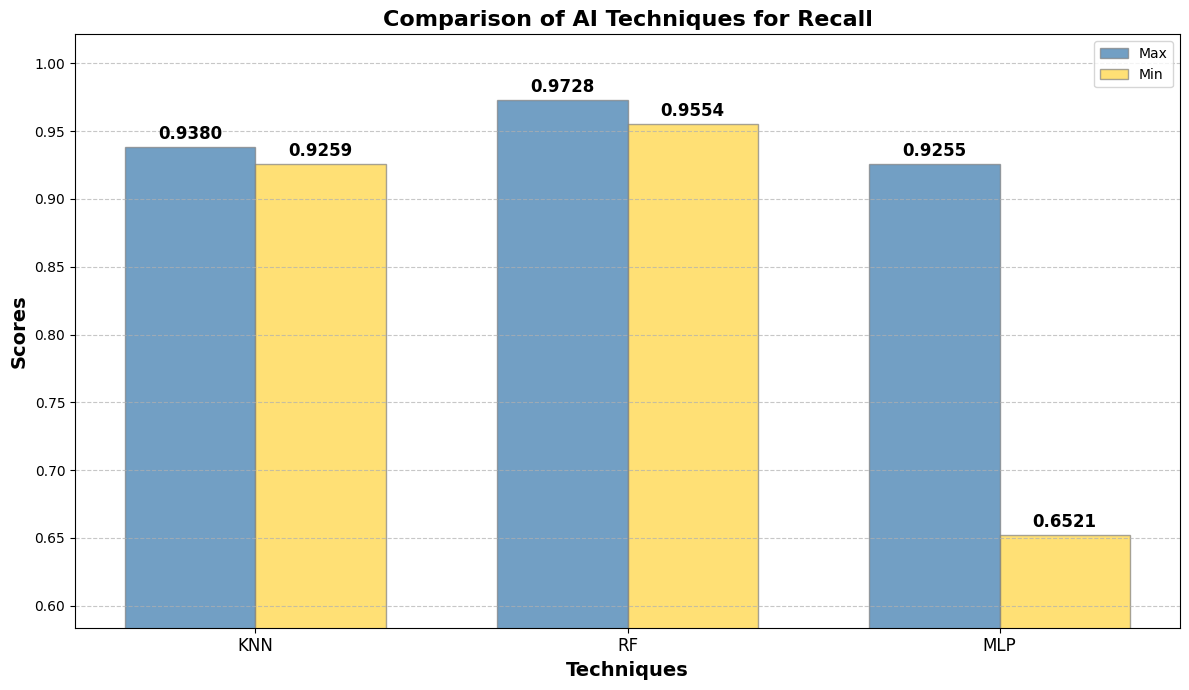

In [ ]:
# Nomes das métricas
metrics = ['KNN', 'RF', 'MLP']

if(list_max_and_min[0] > list_max_and_min[1]):
  x = list_max_and_min[0]
  u = list_max_and_min[1]
else:
  x = list_max_and_min[1]
  u = list_max_and_min[0]

if(list_max_and_min[2] > list_max_and_min[4]):
  y = list_max_and_min[2]
else:
  y = list_max_and_min[4]

if(list_max_and_min[6] > list_max_and_min[8]):
  z = list_max_and_min[6]
else:
  z = list_max_and_min[8]

if(list_max_and_min[3] < list_max_and_min[5]):
  v = list_max_and_min[3]
else:
  v = list_max_and_min[5]

if(list_max_and_min[7] < list_max_and_min[9]):
  w = list_max_and_min[7]
else:
  w = list_max_and_min[9]

# Valores das métricas para cada série de dados
values1 = [x, y, z]
values2 = [u, v, w]

# Nomes das técnicas
techniques = ['KNN', 'RF', 'MLP']

# Configurando a largura das barras
bar_width = 0.35

# Configurando as posições das barras no eixo x
r1 = np.arange(len(values1))
r2 = [x + bar_width for x in r1]

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, values1, color='#3776AB', width=bar_width, edgecolor='grey', alpha=0.7, label='Max')
bars2 = plt.bar(r2, values2, color='#FFD43B', width=bar_width, edgecolor='grey', alpha=0.7, label='Min')

# Adicionando os rótulos das métricas no eixo x
plt.xlabel('Techniques', fontweight='bold', fontsize=14)
plt.ylabel('Scores', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width / 2 for r in range(len(values1))], techniques, fontsize=12)

# Adicionando título e legenda
plt.title('Comparison of AI Techniques for Recall', fontsize=16, fontweight='bold')
plt.legend()

# Adicionando grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar etiquetas de valores nas barras
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}',  # Mostra até 4 casas decimais
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 pontos de deslocamento vertical
                     textcoords='offset points',
                     ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Adicionando as etiquetas de valores nas barras
add_value_labels(bars1)
add_value_labels(bars2)

# Ajustando a escala do eixo y para aumentar a perceptibilidade das diferenças
max_value = max(max(values1), max(values2))
plt.ylim(0.6 * max_value, 1.05 * max_value)  # Ajusta o limite inferior do eixo y

# Ajustando as margens
plt.tight_layout()

# Exibindo o gráfico
plt.show()


#**Conclusão**

Na atividade `meu primeiro classificador` a precisão final para nossa dupla foi em torno de 89%, agora utilizando essas técnicas de IA a maioria chega próximo de 100% de acerto, isso implica que com a estratégia certa, e com os valores corretos para se iniciar o treino, é possível chegar muito próximo de 100% de acertos.

No caso da MLP por exemplo, com algumas métricas geradas aleatóriamente ela não possui um bom desempenho, implicando que é necessário ter um conhecimento de qual métrica é a ideal de se aplicar.

No geral todas as técnicas tiveram um bom desempenho, mas é inegável que em termo de menos esforço computacional o KNN se sobressai, logicamente se o número de vizinhos não for muito grande, para um problema com muitas instâncias o KNN pode não ser uma boa opção, mas como esse problema possui poucas instâncias, o KNN se demonstrou bem sólido.

Mas em termo de precisões a melhor técninca foi a Random Forest, apesar de levar mais tempo para se processar, esse esforço vale a pena se você estiver buscando a maior precisão possível.